**BBM473 Database Laboratory (Spring 2022)**


Exercise 7: Relational Algebra & Logical Equivalence
=============================

First, execute the following codes below.

**Note:** You may need to install `markdown`:

    $ pip install markdown

In [ ]:
%load_ext sql
%sql sqlite://

%load_ext autoreload
%autoreload 2

# To help render markdown
from IPython.core.display import display, Markdown
from markdown import markdown
def render_markdown_raw(m): return display(Markdown(markdown(m))) # must be last element of cell.
def render_markdown(m): return render_markdown_raw(m.toMD())

# import the relational algbera operators
from relation_algebra import Select, Project, NJoin, BaseRelation
from relation_algebra import get_result

from display_tools import side_by_side

In [ ]:
%%sql
drop table if exists R; create table R(A int, B int);
drop table if exists S; create table S(B int, C int);
drop table if exists T; create table T(C int, D int);
drop table if exists U; create table U(D int, E int);

In [ ]:
for x in range(0,10,2):
    for y in range(0,10,3):
        %sql INSERT INTO R VALUES (:x, :y);
for x in range(0,20,4):
    for y in range(0,10,2):
        %sql INSERT INTO S VALUES (:x, :y);
for x in range(0,5,1):
    for y in range(0,10,2):
        %sql INSERT INTO T VALUES (:x, :y);
for x in range(0,10,2):
    for y in range(0,5,1):
        %sql INSERT INTO U VALUES (:x, :y);

### Tutorial: Relational Algebra Python Toolkit

We'll use a python toolkit we made to play around with RA.  We'll get started with a quick tutorial, but the syntax should also be pretty intuitive (feel free to look at the source code too!)

#### BaseRelation class

Recall that in our RA operations we'll deal with sets; to get started, we need to take SQL output and turn it into a `BaseRelation` object, which we can optionally name:

In [ ]:
r = %sql SELECT * FROM R;
R = BaseRelation(r, name="R")

s = %sql SELECT * FROM S;
S = BaseRelation(s, name="S")

t = %sql SELECT * FROM T;
T = BaseRelation(t, name="T")

u = %sql SELECT * FROM U;
U = BaseRelation(u, name="U")

For **all operators in our toolkit**, we can use `get_result` to see the set we have:

In [ ]:
print (get_result(R))

And (again **for all operators in our toolkit**) we can use `render_markdown(R)`

**_NOTE: This function requires that you have installed the `markdown` python library.  It's just for this function / pretty printing, so if you weren't able to install this library, don't worry!_**

In [ ]:
render_markdown(R)
render_markdown(S)
render_markdown(T)

#### Selection, Projection, NJoin classes

In [ ]:
s = Select("A", 2, R)
render_markdown(s)
print(get_result(s))

In [ ]:
p = Project(["A"], R)
render_markdown(p)
print (get_result(p))

In [ ]:
j = NJoin(R, S)
render_markdown(j)
print (get_result(j))

#### Compositionality

Most importantly, these operators are all compositional, so you can pass them in as inputs to each other (as we already did with passing `BaseRelation` into the operators above)!

### Task 1: SQL -> RA

Let's go through some examples where we'll translate SQL to Relational Algebra- note you can use the tools to debug / test your answers!

**NOTE:** The instances we use are randomly generated- feel free to re-generate above to get more useful test examples!

In [ ]:
r = %sql SELECT * FROM R;
s = %sql SELECT * FROM S;
side_by_side(r,s)

**For each of the below queries, translate them from SQL into RA using the python RA toolkit!**

### Task 1.a

In [ ]:
%%sql
SELECT DISTINCT R.B
FROM R
WHERE R.A = 2;

In [ ]:
# ANSWER HERE

### Task 1.b (20 pts.)

In [ ]:
%%sql
SELECT DISTINCT R.A, S.C
FROM R, S
WHERE R.B = S.B;

In [ ]:
# ANSWER HERE

### Task 1.c (30 pts.)

In [ ]:
%%sql
SELECT DISTINCT R.A, T.D
FROM R, S, T
WHERE R.B = S.B AND S.C = T.C AND R.A = 2;

In [ ]:
# ANSWER HERE

### Task 2: RA -> SQL

Let's go through some examples where we'll translate Relational Algebra to SQL- note you can use the tools to debug / test your answers!

**NOTE: The instances we use are randomly generated- feel free to re-generate above to get more useful test examples!**

### Task 2.a

In [ ]:
x = Select("B", 0, Project(["B"], BaseRelation(s, name="S")))
render_markdown(x)
print (get_result(x))

In [ ]:
%%sql

-- SQL QUERY HERE

### Task 2.b (20 pts.)

In [ ]:
x = Project(["A","C"],
            NJoin(
                NJoin(Select("B", 0, BaseRelation(r, name="R")), BaseRelation(s, name="S")),
                Select("C", 0, BaseRelation(t, name="T"))
            )
           )
render_markdown(x)
print (get_result(x))

In [ ]:
%%sql

-- SQL QUERY HERE

### Task 2.c (30 pts. + 10 pts. bonus)

Turn the below into SQL!  Optionally, turn it into an RA expression in our toolkit first!


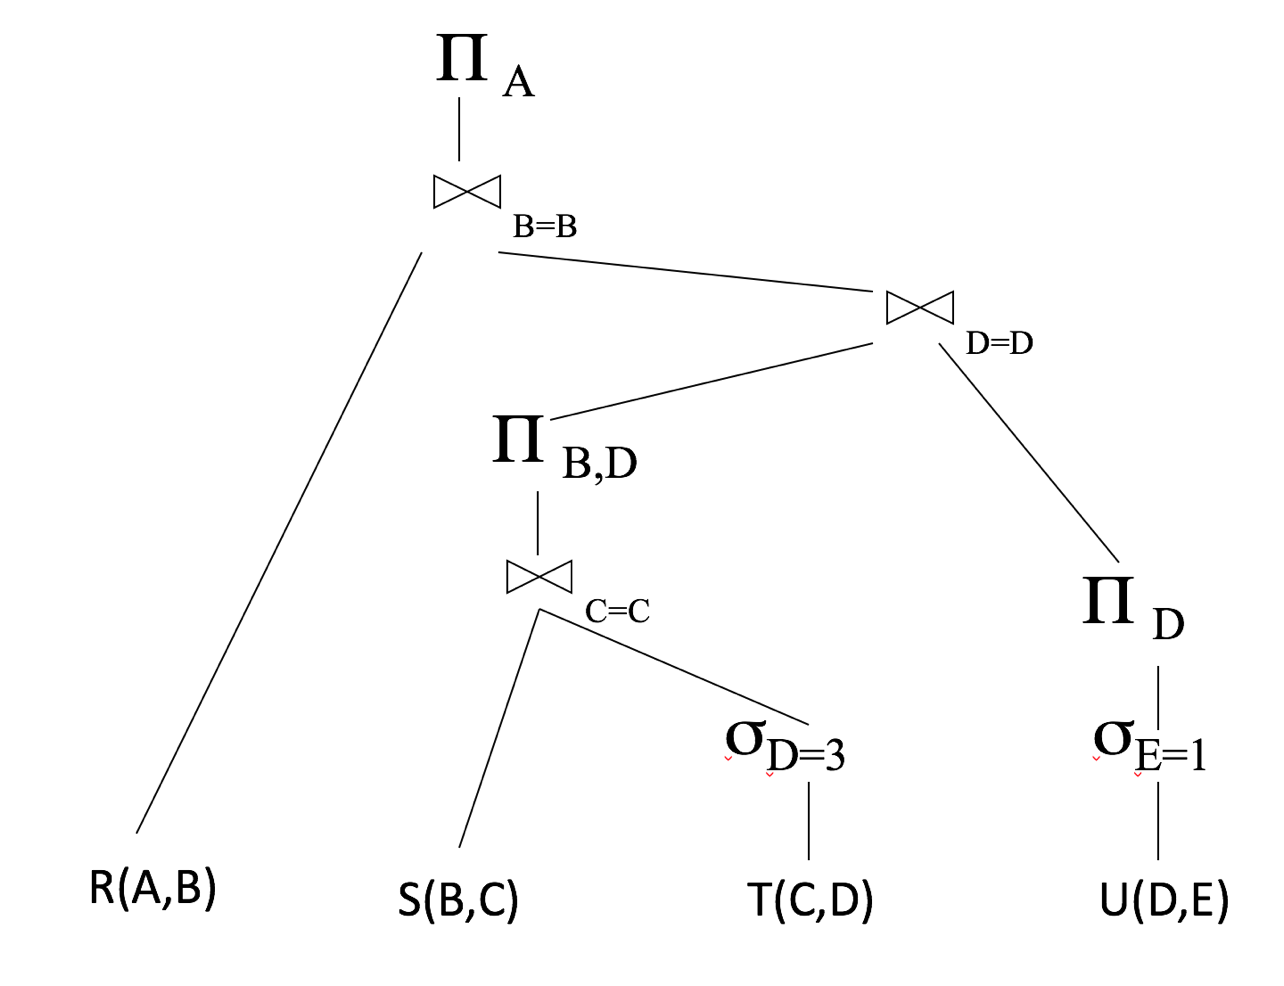

In [ ]:
%%sql
-- SQL QUERY HERE

In [ ]:
## RL HERE (Optional - Bonus)